In [1]:
import numpy as np
import pchem as pc
from scipy import optimize
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt


# Equilibrium solver

In [18]:
# Inputs - 

DeltaH = 175e3 # in J/mol
DeltaS = 150
Delta_Cp = 52
T0 = 950
R = 8.3145


def DeltaG_0(T, DeltaH, DeltaS, Delta_Cp=0, T0=298):
    DH_T = DeltaH + (T-T0)*Delta_Cp
    DS_T = DeltaS + Delta_Cp*np.log(T/T0)
    return DH_T - T*DS_T

def lnK(T, DeltaH, DeltaS, Delta_Cp=0, T0=298):
    return -DeltaG_0(T, DeltaH, DeltaS, Delta_Cp, T0)/(R*T)

In [19]:
df = pd.read_excel("/Users/dwyerry/Dropbox/__mu/pchem1-2020/e3-equilibrium/CaCo3-CaO-CO2-eq.xlsx")
df
T = df['T_K'].values
P_bar = df['P_Pa']/1e5
lnK_expt = np.log(P_bar)

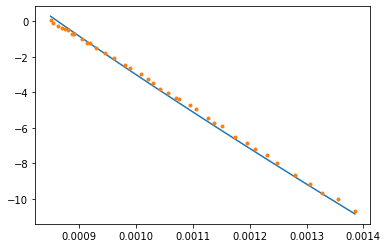

In [20]:
lnK_T = lnK(T, DeltaH, DeltaS, Delta_Cp,T0)

plt.plot(1/T, lnK_T)
plt.plot(1/T, lnK_expt, '.')